In [ ]:
#dealing with the data

import pandas as pd

df = pd.read_excel("data/dados_cerveja_nota.xlsx")
df.head()

,id,cerveja,nota
0,1,1,0.75
1,2,1,3.00
2,3,2,1.75
3,4,3,1.75
4,5,4,4.20


In [32]:
# plot the scatter using 

import plotly.express as px

fig = px.scatter(df, x="cerveja", y="nota", template="plotly_dark")
fig.show()

In [39]:
fig = px.histogram(df, x="nota", color="cerveja", template="plotly_dark", nbins=5)
fig.update_layout(barmode='overlay')
fig.show()

In [23]:
#all the ML shit

from sklearn import linear_model
from sklearn import tree

X = df[["cerveja"]]
y = df["nota"]

reg = linear_model.LinearRegression()
reg.fit(X, y)

arvore_full = tree.DecisionTreeRegressor(random_state=42)
arvore_full.fit(X, y)

arvore_d2 = tree.DecisionTreeRegressor(random_state=42, max_depth=2)
arvore_d2.fit(X, y)

a, b = reg.intercept_, reg.coef_[0]
print(a, b)

0.15161290322580534 1.0362903225806452


In [24]:
#predictions

pred_reg = reg.predict(X.drop_duplicates())
pred_arvore_full = arvore_full.predict(X.drop_duplicates())
pred_arvore_d2 = arvore_d2.predict(X.drop_duplicates())


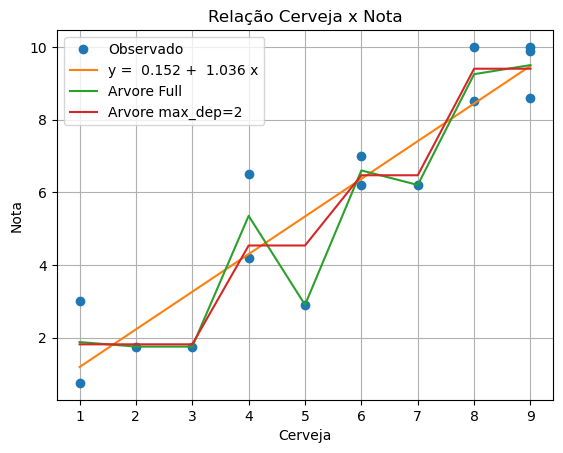

In [ ]:
#fucking graph

import matplotlib.pyplot as plt

plt.plot(X["cerveja"], y, "o")
plt.grid()
plt.xlabel("Cerveja")
plt.ylabel("Nota")
plt.title("Relação Cerveja x Nota")

plt.plot(X["cerveja"].drop_duplicates(), pred_reg)
plt.plot(X["cerveja"].drop_duplicates(), pred_arvore_full)
plt.plot(X["cerveja"].drop_duplicates(), pred_arvore_d2)

plt.legend(["Observado",
            f'y = {a: .3f} + {b: .3f} x',
            "Arvore Full",
            "Arvore max_dep=2"
            ])

[Text(0.5, 0.8333333333333334, '1 <= 5.5\nsquared_error = 9.772\nsamples = 15\nvalue = 5.817'),
 Text(0.25, 0.5, '1 <= 3.5\nsquared_error = 3.126\nsamples = 7\nvalue = 2.979'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.637\nsamples = 4\nvalue = 1.812'),
 Text(0.375, 0.16666666666666666, 'squared_error = 2.216\nsamples = 3\nvalue = 4.533'),
 Text(0.75, 0.5, '1 <= 7.5\nsquared_error = 2.372\nsamples = 8\nvalue = 8.3'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.142\nsamples = 3\nvalue = 6.467'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.484\nsamples = 5\nvalue = 9.4')]

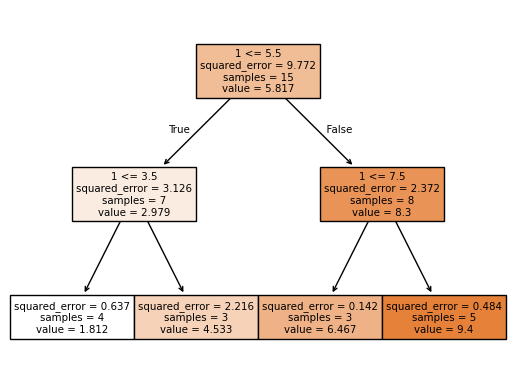

In [30]:
plt.Figure(dpi=400)

tree.plot_tree(arvore_d2,
               feature_names=X["cerveja"],
               filled=True)